### https://dsstudy.tistory.com/10
##### 참고한 블로그

### https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM  
##### (tensorflow의 lstm 공식문서) -> 옵션들 파악
#### lstm 적용하려면 3차원 array 형태로 변환해야함 
##### [data_size , time_steps, features] ([batch size, time steps, input_dims])

In [181]:
import pandas as pd
import seaborn as sns
import FinanceDataReader as fdr

In [182]:
from bs4 import BeautifulSoup
import requests


###lg 화학 분석
if __name__ == '__main__':
    url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
    req = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text

    html = BeautifulSoup(req, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]

last_page
#마지막 페이지가 522


'651'

In [183]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'

for page in range(1, int(last_page)+1) :
  page_url = '{}&page={}'.format(sise_url,page)
  df = df.append(pd.read_html(requests.get(page_url,headers={'User-agent': 'Mozilla/5.0'}).text)[0])
  
df = df.dropna()
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2022.05.31,67400.0,300.0,67500.0,67500.0,66700.0,23430836.0
2,2022.05.30,67700.0,1200.0,67500.0,67800.0,66900.0,14255484.0
3,2022.05.27,66500.0,600.0,66700.0,66900.0,66200.0,11405555.0
4,2022.05.26,65900.0,500.0,66300.0,67200.0,65500.0,15970890.0
5,2022.05.25,66400.0,100.0,66700.0,67100.0,65900.0,15150490.0
...,...,...,...,...,...,...,...
9,1996.07.01,72000.0,3500.0,69000.0,72300.0,68800.0,147310.0
10,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
11,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
12,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0


In [184]:

df['날짜']= df['날짜'].astype('str')
df['날짜'] = pd.to_datetime(df['날짜'])
# pd.to_datetime(df['date'])
df['날짜']
df.set_index('날짜',inplace=True)
df = df.sort_values('날짜')
df.to_csv('./4주차/samsung')

OSError: Cannot save file into a non-existent directory: '4주차'

Text(0, 0.5, 'price')

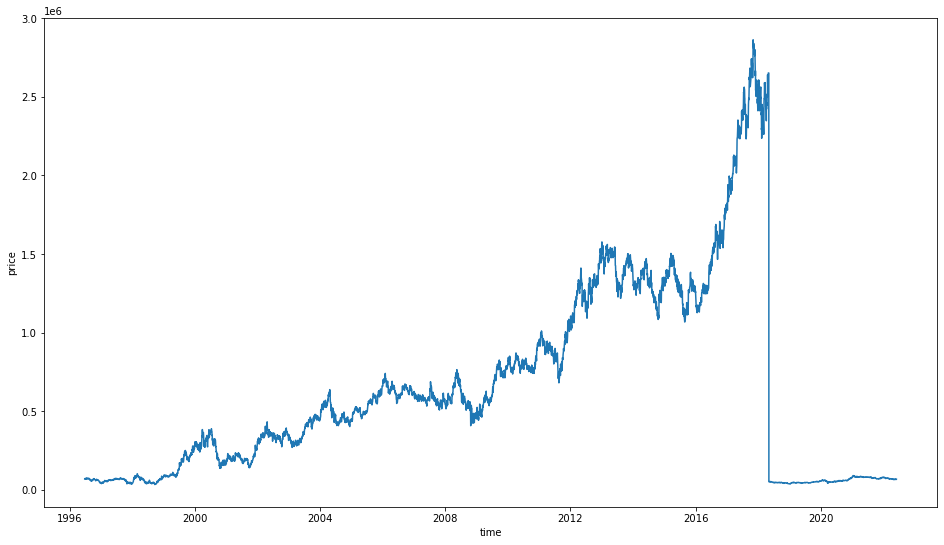

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['종가'], x=df.index)
plt.xlabel('time')
plt.ylabel('price')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 피처값 스케일링
scaler = MinMaxScaler()

df[['전일비','시가','고가','저가','거래량']] = scaler.fit_transform(df[['전일비','시가','고가','저가','거래량']])

# 타켓 스케일링
scaler1 = MinMaxScaler()
df['종가'] = scaler1.fit_transform(df['종가'].values.reshape(-1,1))

# 스케일링 결과 확인
df

,시가,고가,저가,거래량,종가
0,0.023513,0.023609,0.023256,0.001513,0.012165
1,0.023478,0.023540,0.023502,0.001721,0.011882
2,0.023409,0.023818,0.023679,0.001533,0.012307
3,0.023687,0.024026,0.023643,0.001071,0.012448
4,0.024000,0.025139,0.024242,0.001631,0.013686
...,...,...,...,...,...
6505,0.023200,0.023331,0.023221,0.167768,0.011706
6506,0.023061,0.023366,0.023080,0.176853,0.011529
6507,0.023200,0.023261,0.023326,0.126299,0.011741
6508,0.023478,0.023574,0.023573,0.157857,0.012165


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('종가', 1), df['종가'], test_size=0.2, random_state=11, shuffle=False)
print('train set 확인: ' ,  x_train.shape, y_train.shape)
print('test set 확인: ' ,  x_test.shape, y_test.shape)

train set 확인:  (5208, 5) (5208,)
test set 확인:  (1302, 5) (1302,)


In [ ]:
y_test

날짜
2017-02-13    1898000.0
2017-02-14    1879000.0
2017-02-15    1886000.0
2017-02-16    1901000.0
2017-02-17    1893000.0
                ...    
2022-05-25      66400.0
2022-05-26      65900.0
2022-05-27      66500.0
2022-05-30      67700.0
2022-05-31      67400.0
Name: 종가, Length: 1302, dtype: float64

In [ ]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [ ]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
 # X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[earlystopping])

Epoch 1/50
163/163 [==============================] - 8s 22ms/step - loss: 648042.8750 - mse: 641087569920.0000 - val_loss: 576582.0625 - val_mse: 1301915631616.0000
Epoch 2/50
163/163 [==============================] - 3s 18ms/step - loss: 648041.0625 - mse: 641085341696.0000 - val_loss: 576580.1250 - val_mse: 1301913272320.0000
Epoch 3/50
163/163 [==============================] - 3s 16ms/step - loss: 648039.1250 - mse: 641082261504.0000 - val_loss: 576577.5000 - val_mse: 1301910257664.0000
Epoch 4/50
163/163 [==============================] - 3s 18ms/step - loss: 648035.7500 - mse: 641077870592.0000 - val_loss: 576573.8125 - val_mse: 1301906194432.0000
Epoch 5/50
163/163 [==============================] - 3s 18ms/step - loss: 648031.8125 - mse: 641072693248.0000 - val_loss: 576569.5625 - val_mse: 1301901344768.0000
Epoch 6/50
163/163 [==============================] - 3s 18ms/step - loss: 648027.0000 - mse: 641066270720.0000 - val_loss: 576564.1875 - val_mse: 1301895184384.0000
Epoc

In [ ]:
pred = model.predict(test_data)
pred.shape

41/41 [==============================] - 1s 8ms/step


(1282, 1)

In [ ]:
print(pred.shape)
print(y_test.shape)

(1282, 1)
(1302,)


In [ ]:
pred

array([[811.427  ],
       [811.427  ],
       [811.427  ],
       ...,
       [811.427  ],
       [811.42706],
       [811.42706]], dtype=float32)

In [ ]:
y_test

날짜
2017-02-13    1898000.0
2017-02-14    1879000.0
2017-02-15    1886000.0
2017-02-16    1901000.0
2017-02-17    1893000.0
                ...    
2022-05-25      66400.0
2022-05-26      65900.0
2022-05-27      66500.0
2022-05-30      67700.0
2022-05-31      67400.0
Name: 종가, Length: 1302, dtype: float64

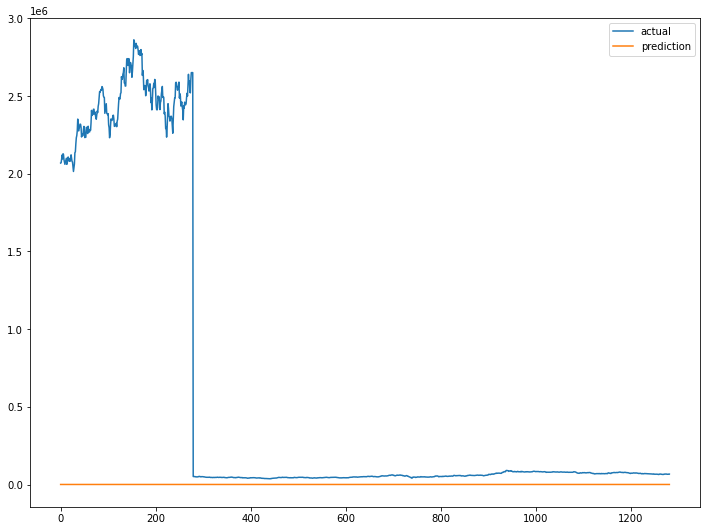

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()